# Visualisation de données métagénomiques

L'ARN ribosomal 16S (ARNr 16S) est un composant du ribosome, la structure cellulaire responsable de la synthèse des protéines. C'est un gène hautement conservé et il est souvent utilisé en biologie moléculaire comme marqueur pour identifier et classer les bactéries. En écologie microbienne et en métagénomique, le séquençage du gène de l'ARNr 16S est couramment utilisé pour étudier la diversité des communautés microbiennes dans divers environnements, y compris les toilettes publiques, en amplifiant et en séquençant une partie du gène. Les informations de séquence obtenues peuvent ensuite être comparées à des bases de données pour déterminer l'abondance relative et l'identité des bactéries présentes dans l'échantillon.

L’étude sur laquelle repose ce notebook correspond à une recherche sur la diversité microbienne des environnements intérieurs, en particulier les toilettes publiques, dans le Colorado, aux États-Unis. L'étude a utilisé le pyroséquençage à code-barres du gène de l'ARNr 16S pour caractériser les communautés bactériennes présentes sur dix surfaces dans douze toilettes publiques. L'étude vise ainsi à déterminer la composition des communautés microbiennes sur les surfaces communes, les différences entre les surfaces et les sources de bactéries. 


## Importation des librairies

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib
import plotly.express as px
import plotly
import networkx as nx

import plotly.graph_objects as go
from ipywidgets import interact, Layout
import ipywidgets as widgets

## Importation des jeux de données

### Données de surfaces 

In [2]:
meta_surface = pandas.read_csv("VDB_16S_metadata.txt", sep="\t").dropna()
meta_surface

,SampleID,Gender,Floor,Building,Surface
0,EKCM2.489495,Male,C,Ekeley,Door out
1,EKBM8.489473,Male,B,Ekeley,Faucet handles
2,EKCF4.489498,Female,C,Ekeley,Stall out
3,PTBM9.489505,Male,B,Porter,Soap dispenser
4,EKBF10.489552,Female,B,Ekeley,Sink floor
...,...,...,...,...,...
104,B6.489449,None,C,Porter,Water
105,B5.489455,None,B,Porter,Water
106,B1.489537,None,A,Ekeley,Water
107,B3.489528,None,C,Ekeley,Water


### Données d'abondance

In [3]:
dataset = pandas.read_csv("VDB_16S_dataset.txt", sep="\t").dropna()
dataset

,#OTU ID,EKCM2.489495,EKBM8.489473,EKCF4.489498,PTBM9.489505,EKBF10.489552,PTAM4.489517,EKCM1.489478,EKAM4.489564,EKCM7.489464,...,PTCF8.489486,EKCM9.489514,PTBF4.489483,PTBF1.489562,B6.489449,B5.489455,B1.489537,B3.489528,B2.489526,ConsensusLineage
0,469478,3.0,5.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
1,208196,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
2,378462,0.0,0.0,0.0,0.0,0.0,2.0,2.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...
3,265971,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Actinobacteria; c__Actinobacte...
4,570812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462,198655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,285.0,184.0,437.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
4463,203087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
4464,89363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,43.0,79.0,83.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
4465,542202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,k__Bacteria; p__Cyanobacteria; c__mle1-12; o__...


### Dataframe regroupant la classification phylogénétique pour chaque OTU

In [4]:
phylo = {'#OTU ID':[], 'king':[], 'phyl':[], 'class':[], 'order':[], 'fam':[],'genus':[], 'species':[]}

for index, row in dataset.iterrows():
    phylo['#OTU ID'].append(row['#OTU ID'])
    cons = row["ConsensusLineage"]
    ph = cons.split("; ")
    for ranks in ph:
        r = ranks.split('__')
        if r[0] == 'k':
            phylo['king'].append(r[1])
        elif r[0] == 'p':
            phylo['phyl'].append(r[1])
        elif r[0] == 'c':
            phylo['class'].append(r[1])
        elif r[0] == 'o':
            phylo['order'].append(r[1])
        elif r[0] == 'f':
            phylo['fam'].append(r[1])
        elif r[0] == 'g':
            phylo['genus'].append(r[1])  
        elif r[0] == 's':
            phylo['species'].append(r[1])

    # male = 0
    # female = 0

    # for col_name, col_full in dataset.items():
    #     if (col_name != "#OTU ID") and (col_name != "ConsensusLineage"):
    #         gender = meta_surface.loc[meta_surface["SampleID"] == col_name]["Gender"].values[0]
    #         if gender == 'Male':
    #             male += dataset[col_name][index]
    #         elif gender == 'Female':
    #             female += dataset[col_name][index]
    
    # phylo['Male'].append(male)
    # phylo['Female'].append(female)

dt_phylo = pandas.DataFrame(data=phylo)
dt_phylo

,#OTU ID,king,phyl,class,order,fam,genus,species
0,469478,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Catonella,
1,208196,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methylobacteriaceae,Methylobacterium,Methylobacterium organophilum
2,378462,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,
3,265971,Bacteria,Actinobacteria,Actinobacteria (class),Actinomycetales,Pseudonocardiaceae,,
4,570812,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Rhodospirillaceae,,
...,...,...,...,...,...,...,...,...
4462,198655,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,,
4463,203087,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,,
4464,89363,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Hyphomicrobiaceae,Hyphomicrobium,
4465,542202,Bacteria,Cyanobacteria,mle1-12,,,,


#### Remplacement des valeurs vides

In [5]:
# dt_phylo['class'] = dt_phylo['class'].replace(r'^\s*$', "NoneC", regex=True)
# dt_phylo['fam'] = dt_phylo['fam'].replace(r'^\s*$', "NoneF", regex=True)

for col_name, col_full in dt_phylo.items():
    dt_phylo[col_name] = dt_phylo[col_name].replace(r'^\s*$', f"Unknown {col_name}", regex=True)

dt_phylo

,#OTU ID,king,phyl,class,order,fam,genus,species
0,469478,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Catonella,Unknown species
1,208196,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methylobacteriaceae,Methylobacterium,Methylobacterium organophilum
2,378462,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Unknown species
3,265971,Bacteria,Actinobacteria,Actinobacteria (class),Actinomycetales,Pseudonocardiaceae,Unknown genus,Unknown species
4,570812,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Rhodospirillaceae,Unknown genus,Unknown species
...,...,...,...,...,...,...,...,...
4462,198655,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,Unknown genus,Unknown species
4463,203087,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Unknown genus,Unknown species
4464,89363,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Hyphomicrobiaceae,Hyphomicrobium,Unknown species
4465,542202,Bacteria,Cyanobacteria,mle1-12,Unknown order,Unknown fam,Unknown genus,Unknown species


### Dataframe regroupant les surfaces pour chaque OTU

#### Hommes et Femmes regroupés

In [6]:
dt_surf = dataset.copy()
new_columns = []

for col in dt_surf.columns:
    if col=="#OTU ID" :
        new_columns.append(col)
    elif col =="ConsensusLineage":
        new_columns.append(col)
    else:
        new_columns.append(meta_surface.loc[meta_surface["SampleID"] == col]["Surface"].values[0])
        
dt_surf.columns = new_columns
dt_surf = dt_surf.groupby(lambda x:x, axis=1).sum()
dt_surf


,#OTU ID,ConsensusLineage,Door in,Door out,Faucet handles,Sink floor,Soap dispenser,Stall in,Stall out,Toilet Floor,Toilet flush handle,Toilet seat,Water
0,469478,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.0,3.0,5.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0
1,208196,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,378462,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...,51.0,16.0,9.0,0.0,0.0,15.0,13.0,2.0,2.0,0.0,0.0
3,265971,k__Bacteria; p__Actinobacteria; c__Actinobacte...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,570812,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462,198655,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,906.0
4463,203087,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4464,89363,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0
4465,542202,k__Bacteria; p__Cyanobacteria; c__mle1-12; o__...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


#### Dataframe regroupant les surfaces pour chaque OTU ches les hommes

In [7]:
dt_surf_male = dataset.copy()
new_columns = []
drop_columns = []

for col in dt_surf_male.columns:
    if col=="#OTU ID" :
        new_columns.append(col)
    elif col =="ConsensusLineage":
        new_columns.append(col)
    elif meta_surface.loc[meta_surface["SampleID"] == col]["Gender"].values[0] == "Male":
        new_columns.append(meta_surface.loc[meta_surface["SampleID"] == col]["Surface"].values[0])
    else:
        drop_columns.append(col)
    
dt_surf_male = dt_surf_male.drop(drop_columns, axis=1)
dt_surf_male.columns = new_columns
dt_surf_male = dt_surf_male.groupby(lambda x:x, axis=1).sum()
dt_surf_male

,#OTU ID,ConsensusLineage,Door in,Door out,Faucet handles,Sink floor,Soap dispenser,Stall in,Stall out,Toilet Floor,Toilet flush handle,Toilet seat
0,469478,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.0,3.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1,208196,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,378462,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...,40.0,12.0,6.0,0.0,0.0,15.0,13.0,2.0,2.0,0.0
3,265971,k__Bacteria; p__Actinobacteria; c__Actinobacte...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,570812,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4462,198655,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4463,203087,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4464,89363,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4465,542202,k__Bacteria; p__Cyanobacteria; c__mle1-12; o__...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Dataframe regroupant les surfaces pour chaque OTU ches les femmes

In [8]:
dt_surf_female = dataset.copy()
new_columns = []
drop_columns = []

for col in dt_surf_female.columns:
    if col=="#OTU ID" :
        new_columns.append(col)
    elif col =="ConsensusLineage":
        new_columns.append(col)
    elif meta_surface.loc[meta_surface["SampleID"] == col]["Gender"].values[0] == "Female":
        new_columns.append(meta_surface.loc[meta_surface["SampleID"] == col]["Surface"].values[0])
    else:
        drop_columns.append(col)

dt_surf_female = dt_surf_female.drop(drop_columns, axis=1)
dt_surf_female.columns = new_columns
dt_surf_female = dt_surf_female.groupby(lambda x:x, axis=1).sum()
dt_surf_female

,#OTU ID,ConsensusLineage,Door in,Door out,Faucet handles,Sink floor,Soap dispenser,Stall in,Stall out,Toilet Floor,Toilet flush handle,Toilet seat
0,469478,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
1,208196,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,378462,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...,11.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,265971,k__Bacteria; p__Actinobacteria; c__Actinobacte...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,570812,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4462,198655,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4463,203087,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4464,89363,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4465,542202,k__Bacteria; p__Cyanobacteria; c__mle1-12; o__...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualisation simple (phylum)

### Modifications des données pour la visualisation

In [9]:
# Dictionnaire ayant pour clés les surfaces de prélèvement et pour valeur un dictionnaire 'phylum': valeur de l'abondance.

dict_surf = {}
for item, column in dataset.items():
    if (item != "#OTU ID") and (item != "ConsensusLineage"):
        surf = meta_surface.loc[meta_surface["SampleID"] == item]["Surface"].values[0]
        
        if surf not in dict_surf:
            dict_surf[surf] = {}
            
        # for index in column.index:
        #     phyl = dataset["Phylum"][index]
        #     if phyl not in dict_surf[surf]:
        #         dict_surf[surf][phyl] = column[index]
        #     else:
        #         dict_surf[surf][phyl] += column[index]

        for index in column.index:
            phylo = dt_phylo["phyl"][index]
            if phylo not in dict_surf[surf]:
                dict_surf[surf][phylo] = column[index]
            else:
                dict_surf[surf][phylo] += column[index]

# dict_surf


In [10]:
# Dictionnaire de l'abundance totale par surface 
# Non utilisé

dict_abund = {}
for place in dict_surf:
    dict_abund[place] = sum(dict_surf[place].values())

# dict_abund

In [11]:
# Récupération des labels pour l'affichage de la légende
labels_surf = list(dict_surf.keys())
# labels_surf

In [12]:
# Modification du format du dictionnaire pour l'affichage du barplot
dict_phyl = {}

for surface in dict_surf.values():
    # print(surface)
    for phyl in surface:
        if phyl in dict_phyl:
            dict_phyl[phyl].append(surface[phyl])
        else:
            dict_phyl[phyl] = [surface[phyl]]

# dict_phyl

### Stacked Barplot de l'abondance microbienne en fonction de la surface

[Text(0.0, 0, 'Door out'),
 Text(1.0, 0, 'Faucet handles'),
 Text(2.0, 0, 'Stall out'),
 Text(3.0, 0, 'Soap dispenser'),
 Text(4.0, 0, 'Sink floor'),
 Text(5.0, 0, 'Door in'),
 Text(6.0, 0, 'Toilet Floor'),
 Text(7.0, 0, 'Stall in'),
 Text(8.0, 0, 'Toilet flush handle'),
 Text(9.0, 0, 'Toilet seat'),
 Text(10.0, 0, 'Water')]

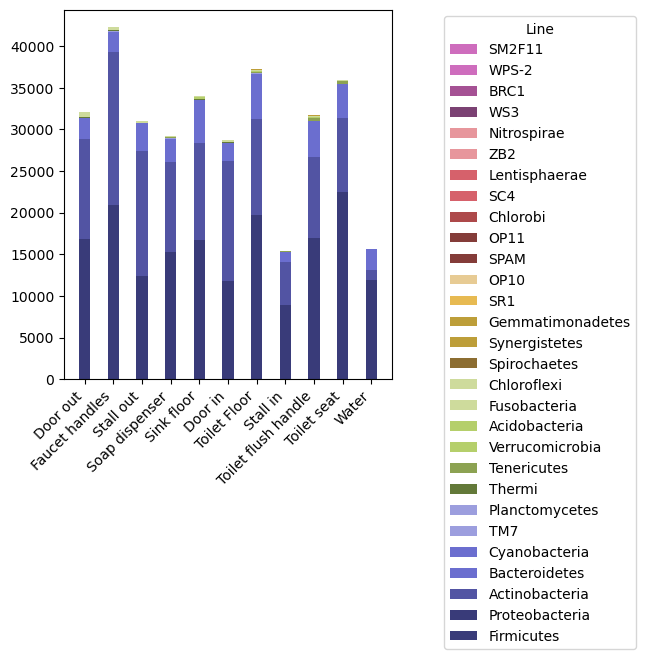

In [13]:
bottom = np.array([0.0 for i in range(11)])
cmap = matplotlib.cm.get_cmap('tab20b')
cnt = 0

# fig, ax = plt.subplots()
fig, (ax, lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios":[4, 1.5]})

for phyl in dict_phyl:
    ax.bar(labels_surf, dict_phyl[phyl], width=0.4, bottom=bottom, label=phyl, color=cmap(cnt))
    bottom += np.array(dict_phyl[phyl])
    cnt += 1/30

# ax.legend(list(dict_phyl.keys()))
handles, labels = ax.get_legend_handles_labels()
lax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
lax.axis("off")

ax.set_xticks(labels_surf)
ax.set_xticklabels(labels_surf, rotation=45, ha='right')
# ax.tick_params(axis="x", labelrotation=45)

### Stacked Barplot (seuil d'abondance fixé à 100)

In [14]:
dict_phyl_high = {}
dict_phyl_low = {}

for phyl in dict_phyl:
    low = True
    for val in dict_phyl[phyl]:
        if val > 100:
            low = False
    if low:
        dict_phyl_low[phyl] = dict_phyl[phyl]
    else:
        dict_phyl_high[phyl] = dict_phyl[phyl]

[Text(0.0, 0, 'Door out'),
 Text(1.0, 0, 'Faucet handles'),
 Text(2.0, 0, 'Stall out'),
 Text(3.0, 0, 'Soap dispenser'),
 Text(4.0, 0, 'Sink floor'),
 Text(5.0, 0, 'Door in'),
 Text(6.0, 0, 'Toilet Floor'),
 Text(7.0, 0, 'Stall in'),
 Text(8.0, 0, 'Toilet flush handle'),
 Text(9.0, 0, 'Toilet seat'),
 Text(10.0, 0, 'Water')]

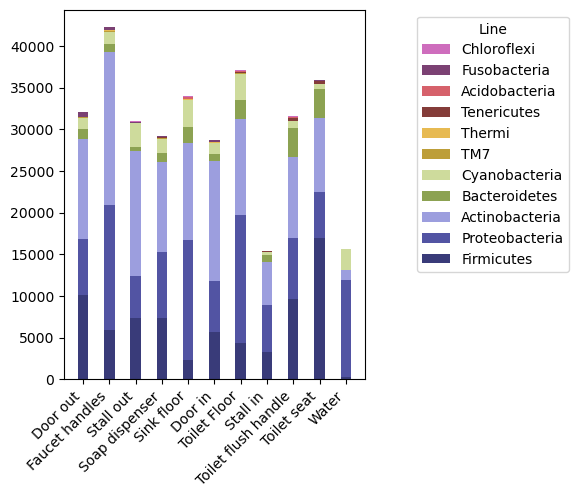

In [15]:
bottom = np.array([0.0 for i in range(11)])
cmap = matplotlib.cm.get_cmap('tab20b')
cnt = 0

# fig, ax = plt.subplots()
fig, (ax, lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios":[4, 2]})

for phyl in dict_phyl_high:
    ax.bar(labels_surf, dict_phyl_high[phyl], width=0.4, bottom=bottom, label=phyl, color=cmap(cnt))
    bottom += np.array(dict_phyl_high[phyl])
    cnt += 1/len(dict_phyl_high)

# ax.legend(list(dict_phyl_high.keys()))
handles, labels = ax.get_legend_handles_labels()
lax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
lax.axis("off")

ax.set_xticks(labels_surf)
ax.set_xticklabels(labels_surf, rotation=45, ha='right')

[Text(0.0, 0, 'Door out'),
 Text(1.0, 0, 'Faucet handles'),
 Text(2.0, 0, 'Stall out'),
 Text(3.0, 0, 'Soap dispenser'),
 Text(4.0, 0, 'Sink floor'),
 Text(5.0, 0, 'Door in'),
 Text(6.0, 0, 'Toilet Floor'),
 Text(7.0, 0, 'Stall in'),
 Text(8.0, 0, 'Toilet flush handle'),
 Text(9.0, 0, 'Toilet seat'),
 Text(10.0, 0, 'Water')]

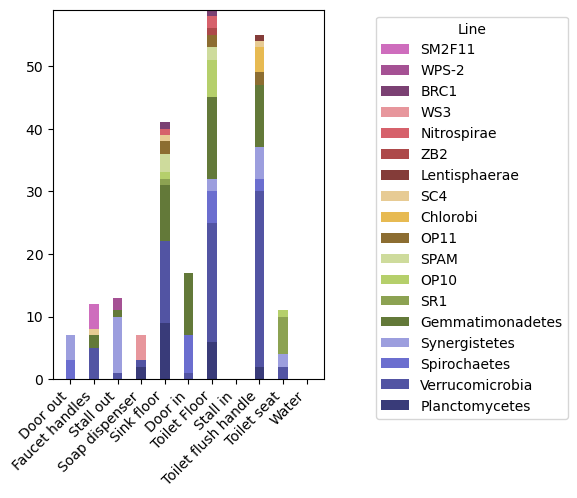

In [16]:
bottom = np.array([0.0 for i in range(11)])
cmap = matplotlib.cm.get_cmap('tab20b')
cnt = 0

# fig, ax = plt.subplots()
fig, (ax, lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios":[3, 2]})

for phyl in dict_phyl_low:
    ax.bar(labels_surf, dict_phyl_low[phyl], width=0.4, bottom=bottom, label=phyl, color=cmap(cnt))
    bottom += np.array(dict_phyl_low[phyl])
    cnt += 1/len(dict_phyl_low)

# ax.legend(list(dict_phyl_low.keys()))
handles, labels = ax.get_legend_handles_labels()
lax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
lax.axis("off")

ax.set_xticks(labels_surf)
ax.set_xticklabels(labels_surf, rotation=45, ha='right')

### Heatmap

In [17]:
list_phyl = ['Actinobacteria', 'Proteobacteria', 'Firmicutes', 'Cyanobacteria', 'Bacteroidetes']

In [18]:
# Heatmap pour l'ensemble des phylums
# abundance = np.array(list(dict_phyl.values()))
# phylums = list(dict_phyl.keys())

# Heatmap pour les phylums les plus abondants
abundance = np.array([dict_phyl[key] for key in list_phyl])
phylums = list_phyl

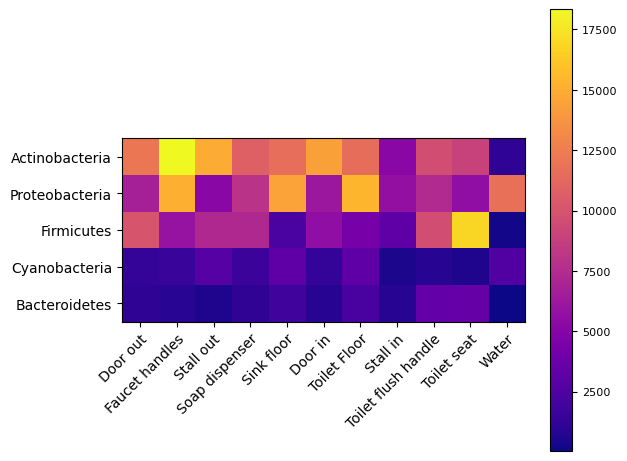

In [19]:
fig, ax = plt.subplots()
im = ax.imshow(abundance, cmap='plasma')

ax.set_xticks(np.arange(len(labels_surf)), labels=labels_surf)
ax.set_yticks(np.arange(len(phylums)), labels=phylums)

plt.rc('font', size=8)
# plt.rc('legend', fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

cb = plt.colorbar(im, ax = ax)

# Changement du layout pour le poster
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# cb.outline.set_color("white")
# cb.ax.yaxis.set_tick_params(color="white")
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color="white")

fig.tight_layout()

# plt.savefig('./plot/essai.png', transparent=True)

### Stacked Barplot (seuils ajustables par l'utilisateur)

In [64]:
def dictPhyl_constr(phylo, dt, meta):
    dict_surf = {}
    for item, column in dt.items():
        if (item != "#OTU ID") and (item != "ConsensusLineage"):
            surf = meta.loc[meta["SampleID"] == item]["Surface"].values[0]

            if surf not in dict_surf:
                dict_surf[surf] = {}

            for index in column.index:
                phy = dt_phylo[phylo][index]
                if phy not in dict_surf[surf]:
                    dict_surf[surf][phy] = column[index]
                else:
                    dict_surf[surf][phy] += column[index]
    
    labels_surf = list(dict_surf.keys())
                    
    dict_phyl = {}

    for surface in dict_surf.values():
        # print(surface)
        for phyl in surface:
            if phyl in dict_phyl:
                dict_phyl[phyl].append(surface[phyl])
            else:
                dict_phyl[phyl] = [surface[phyl]]
    
    return dict_phyl, labels_surf

dictPhyl_constr('king', dataset, meta_surface)

({'Bacteria': [32072.0,
   42252.0,
   30942.0,
   29167.0,
   34007.0,
   28666.0,
   37188.0,
   15410.0,
   31662.0,
   35882.0,
   15669.0]},
 ['Door out',
  'Faucet handles',
  'Stall out',
  'Soap dispenser',
  'Sink floor',
  'Door in',
  'Toilet Floor',
  'Stall in',
  'Toilet flush handle',
  'Toilet seat',
  'Water'])

In [68]:
def updateMin(smin, smax, phylo):
    dict_phyl = dictPhyl_constr(phylo, dataset, meta_surface)
    labels_surf = dict_phyl[1]
    dict_phyl = dict_phyl[0]

    bottom = np.array([0.0 for i in range(11)])
    cmap = matplotlib.cm.get_cmap('tab20b')
    #cmap = matplotlib.cm.get_cmap('plasma')
    cnt = 0

    # fig, ax = plt.subplots()
    fig, (ax, lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios":[4, 1.5]})

    for phyl in dict_phyl:
        new_ab = []
        for ab in dict_phyl[phyl]:
            if ab < smin or ab > smax:
                new_ab.append(0)
            else:
                new_ab.append(ab)
                
        ax.bar(labels_surf, new_ab, width=0.4, bottom=bottom, label=phyl, color=cmap(cnt))
        bottom += np.array(new_ab)
        cnt += 1/(len(dict_phyl.keys()) + 1)
        #if min(dict_phyl[phyl]) >= s :
            #ax.bar(labels_surf, dict_phyl[phyl], width=0.4, bottom=bottom, label=phyl, color=cmap(cnt))
            #bottom += np.array(dict_phyl[phyl])
            #cnt += 1/29

    # ax.legend(list(dict_phyl.keys()))
    handles, labels = ax.get_legend_handles_labels()
    lax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
    lax.axis("off")

    ax.set_xticks(labels_surf)
    ax.set_xticklabels(labels_surf, rotation=45, ha='right')
    # ax.tick_params(axis="x", labelrotation=45)

wid_sliderMin = widgets.IntSlider(
    value=0,
    min=0,
    max=45000,
    step=10,
    description='Minimum abundance:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=Layout(width='700px'),
    style={'description_width': 'initial'}
)

wid_sliderMax = widgets.IntSlider(
    value=45000,
    min=0,
    max=45000,
    step=10,
    description='Maximum abundance:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=Layout(width='700px'),
    style={'description_width': 'initial'}
)

wid_dropdownPhylo = widgets.Dropdown(
    options=['king', 'phyl', 'class', 'order', 'fam','genus', 'species'],
    value='phyl',
    description='Phylogeny:',
    disabled=False,
)
    
interact(updateMin, smin=wid_sliderMin, smax=wid_sliderMax, phylo=wid_dropdownPhylo)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Minimum abundance:', layout=Lay…

<function __main__.updateMin(smin, smax, phylo)>

## Visualisation par exploitation de l'information hiérarchique

### Abondance en fonction de la classification phylogénétique

#### Modification du dataframe pour la construction de treemap et sunburst

In [21]:
prov = dataset[dataset.columns[1:-1]].sum(axis=1)
prov

0        18.0
1         1.0
2       108.0
3         1.0
4         5.0
        ...  
4462    906.0
4463      6.0
4464    205.0
4465     10.0
4466     25.0
Length: 4467, dtype: float64

In [22]:
dt_treemap = dt_phylo.assign(abund = prov)
# dt_treemap.drop(['ConsensusLineage'], axis=1)
dt_treemap


,#OTU ID,king,phyl,class,order,fam,genus,species,abund
0,469478,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Catonella,Unknown species,18.0
1,208196,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methylobacteriaceae,Methylobacterium,Methylobacterium organophilum,1.0
2,378462,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,Unknown species,108.0
3,265971,Bacteria,Actinobacteria,Actinobacteria (class),Actinomycetales,Pseudonocardiaceae,Unknown genus,Unknown species,1.0
4,570812,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Rhodospirillaceae,Unknown genus,Unknown species,5.0
...,...,...,...,...,...,...,...,...,...
4462,198655,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,Unknown genus,Unknown species,906.0
4463,203087,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Unknown genus,Unknown species,6.0
4464,89363,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Hyphomicrobiaceae,Hyphomicrobium,Unknown species,205.0
4465,542202,Bacteria,Cyanobacteria,mle1-12,Unknown order,Unknown fam,Unknown genus,Unknown species,10.0


#### Treemaps

In [44]:
fig = px.treemap(dt_treemap,
  path = ['king', 'phyl', 'class', 'order', 'fam', 'genus', 'species'],
  values = 'abund',
  color = 'abund',
  width = 900,
  height = 700
)

# fig.data[0].marker.colors = fig.data[0].values

fig.show()

In [24]:
fig = px.treemap(dt_treemap,
  path = ['king', 'phyl'],
  values = 'abund',
  color = 'abund',
  branchvalues = 'total',
  width = 400,
  height = 600,
)

fig.data[0].textinfo = 'label+text+percent entry'
fig.data[0].marker.colors = (fig.data[0].values/max(fig.data[0].values))*100
fig.layout.coloraxis.colorbar.title.text = ("Abundance (%)")

# Changement du layout pour le poster
# fig.update_layout({
# 'font_color': "white",
# 'plot_bgcolor': 'rgba(0, 0, 0, 0)',
# 'paper_bgcolor': 'rgba(0, 0, 0, 0)'
# })

fig.show()


#### Sunbusrts

In [43]:
fig = px.sunburst(dt_treemap, 
path = ['king', 'phyl', 'class', 'order', 'fam', 'genus', 'species'],
values = 'abund',
color = 'abund',
width = 900,
height = 700)

fig.show()

In [26]:
# fig = px.sunburst(dt_treemap, 
# path = ['king', 'phyl', 'class'],
# values = 'abund',
# color = 'abund',
# width = 1400,
# height = 900)

# fig.show()

### Abondance des embranchements (phylum) en fonction du type de surfaces

In [27]:
# dataset.dtypes

#### Abondance par genre de prélèvement de surfaces

In [28]:
dict_gender = {}
for item, column in dataset.items():
    if (item != "#OTU ID") and (item != "ConsensusLineage"):
        surf = meta_surface.loc[meta_surface["SampleID"] == item]["Surface"].values[0]
        gender = meta_surface.loc[meta_surface["SampleID"] == item]["Gender"].values[0]
        
        if surf not in dict_gender:
            dict_gender[surf] = {'Male': 0, 'Female': 0, 'None': 0}

        dict_gender[surf][gender] += dataset[item].sum()


In [29]:
dataset_place = dataset.drop(['ConsensusLineage'], axis=1).set_index(dataset["#OTU ID"]).drop(['#OTU ID'], axis=1).copy()
dataset_place = dataset_place.T

gender_list, surf_list, building_list, floor_list = [], [], [], []

for index, row in dataset_place.iterrows():
    gender_list.append(meta_surface.loc[meta_surface["SampleID"] == index]["Gender"].values[0])
    surf_list.append(meta_surface.loc[meta_surface["SampleID"] == index]["Surface"].values[0])
    building_list.append(meta_surface.loc[meta_surface["SampleID"] == index]["Building"].values[0])
    floor_list.append(meta_surface.loc[meta_surface["SampleID"] == index]["Floor"].values[0])

prov = dataset_place.sum(axis=1)
dataset_place = prov.to_frame(name="abund")


dataset_place['Gender'] = gender_list
dataset_place['Surface'] = surf_list
dataset_place['Building'] = building_list
dataset_place['Floor'] = floor_list

dataset_place


,abund,Gender,Surface,Building,Floor
EKCM2.489495,3895.0,Male,Door out,Ekeley,C
EKBM8.489473,4093.0,Male,Faucet handles,Ekeley,B
EKCF4.489498,4397.0,Female,Stall out,Ekeley,C
PTBM9.489505,4237.0,Male,Soap dispenser,Porter,B
EKBF10.489552,2612.0,Female,Sink floor,Ekeley,B
...,...,...,...,...,...
B6.489449,3087.0,None,Water,Porter,C
B5.489455,4694.0,None,Water,Porter,B
B1.489537,2689.0,None,Water,Ekeley,A
B3.489528,3192.0,None,Water,Ekeley,C


In [45]:
fig = px.treemap(dataset_place, 
path = [px.Constant("all"), 'Building', 'Floor', 'Surface'],
values = 'abund',
color = 'abund',
width = 900,
height = 700)

# fig.data[0].textinfo = 'label+text+percent entry'
# fig.data[0].marker.colors = (fig.data[0].values/max(fig.data[0].values))*100

fig.show()

In [31]:
# fig = px.treemap(dataset_place, 
# path = [px.Constant("all"),'Surface'],
# values = 'abund',
# color = 'abund',
# width = 1400,
# height = 900)


# fig.show()

In [32]:
# fig = px.sunburst(dataset_place, 
# path = ['Building', 'Floor', 'Surface'],
# values = 'abund',
# color = 'abund',
# width = 1400,
# height = 900)

# fig.show()

In [33]:
def create_nodes(param, dataframe, graph):
    if param in dataframe:
        list_nodes = np.unique(dataset_place[param]).tolist()
        # list_nodes = []
        # for p in list_param:
        #     list_nodes.append((p, {'color' : 'red'}))
        graph.add_nodes_from(list_nodes)
    
    return list_nodes

def set_edges(dataframe):
    list_edges = []
    for index, row in dataframe.iterrows():
        for col_name, col_full in dataframe.items():
            if dataframe[col_name][index] != 0:
                list_edges.append((index, col_name))
    
    return list_edges

def color_nodes(list_param, graph):
    list_color_nodes, list_size_nodes = [], []
    for node in graph.nodes:
        if node in list_param:
            list_color_nodes.append('#85586F')
            list_size_nodes.append(2000)
        else:
            list_color_nodes.append('#9EA1D4')
            list_size_nodes.append(300)
    
    return list_color_nodes, list_size_nodes

def create_edges(param, phyl, l_edges, df_meta, df_phyl, df, graph):
    # real_edges = []

    for e in l_edges:
        phyl_rank = df_phyl[phyl][e[0]]
        place = df_meta[param][e[1]]
        # if not graph.has_edge(phyl_rank, place):
        #     graph.add_edge(phyl_rank, place, count = df[e[1]][e[0]])
        # else:
        #     graph[phyl_rank][place]['count'] += df[e[1]][e[0]]
        graph.add_edge(phyl_rank, place)
    # graph.add_edges_from(real_edges)

def array_op(pos_array, m):
    pos_array[1] = pos_array[1]*m
    return pos_array

In [34]:
# x,y, labels = (abundance, pvalues, uniprot_ids)
dataset_OTU = dataset.drop(['ConsensusLineage'], axis=1).set_index(dataset["#OTU ID"]).drop(['#OTU ID'], axis=1)
dt_phylo_OTU = dt_phylo.set_index(dataset["#OTU ID"]).drop(['#OTU ID'], axis=1)
list_edges = []


def updateParam(r, d):
    G = nx.Graph()
    fig_final, ax_final = plt.subplots(figsize=(13, 10))
    ln = create_nodes(r, dataset_place, G)
    le = set_edges(dataset_OTU)

    create_edges(r, d, le, dataset_place, dt_phylo_OTU, dataset_OTU, G)

    # for edge in G.edges:
    #     list_edges.append(np.log(0.3 * G.get_edge_data(*edge)['count']))

    for node, data in G.nodes(data=True):
        if node in ln:
            data['subset'] = 0
        else:
            data['subset'] = 1

    lnc, lns = color_nodes(ln, G)

    pos = nx.multipartite_layout(G)
    pos = {p:(array_op(pos[p], 30) if p in ln else array_op(pos[p], 10)) for p in pos}

    nx.draw(G, pos, node_size = lns, node_color = lnc, alpha = 0.7, edge_color = 'grey', with_labels = False) # width = list_edges
    t = nx.draw_networkx_labels(G, pos, font_size=8)

wid_radio = widgets.RadioButtons(
    options=['Surface', 'Floor', 'Building'],
    description='Parameter:',
    disabled=False
)

wid_dropdown = widgets.Dropdown(
    options=dt_phylo_OTU.columns.tolist(),
    description='Phylogeny:',
    disabled=False,
)

def updateDropdown(w):
    print(w)

interact(updateParam,r=wid_radio, d=wid_dropdown)

interactive(children=(RadioButtons(description='Parameter:', options=('Surface', 'Floor', 'Building'), value='…

<function __main__.updateParam(r, d)>

### Etude de la différence entre toilette homme et femme

[Text(0, 0, 'Door out'),
 Text(1, 0, 'Faucet handles'),
 Text(2, 0, 'Stall out'),
 Text(3, 0, 'Soap dispenser'),
 Text(4, 0, 'Sink floor'),
 Text(5, 0, 'Door in'),
 Text(6, 0, 'Toilet Floor'),
 Text(7, 0, 'Stall in'),
 Text(8, 0, 'Toilet flush handle'),
 Text(9, 0, 'Toilet seat'),
 Text(10, 0, 'Water')]

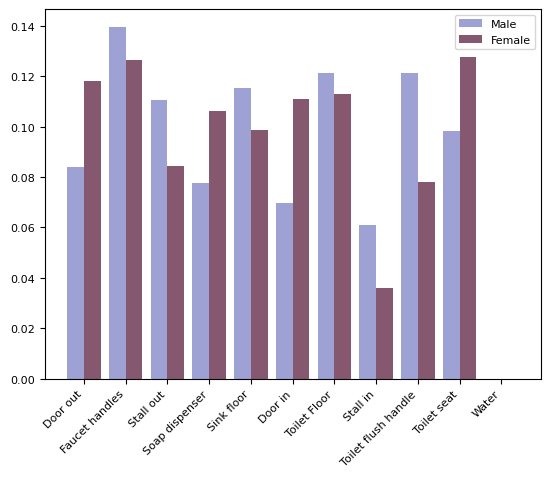

In [35]:
labels_surf = list(dict_gender.keys())
male = [dict_gender[surf]['Male'] for surf in dict_gender]
female = [dict_gender[surf]['Female'] for surf in dict_gender]

sum_male = sum(male)
sum_female = sum(female)

X = np.arange(len(labels_surf))

fig, ax = plt.subplots()

ax.bar(X - 0.2, male/sum_male, width=0.4, color='#9EA1D4', label = 'Male')
ax.bar(X + 0.2, female/sum_female, width=0.4, color='#85586F', label = 'Female')

ax.legend()

ax.set_xticks(X, labels_surf)
ax.set_xticklabels(labels_surf, rotation=45, ha='right')


In [40]:
fig = px.box(dataset_place, x="Surface", y="abund", color="Gender", notched=True, color_discrete_sequence=["#7c06a5", "#eb7554", "#fad824"])

# Changement du layout pour le poster
# fig.update_layout({
# 'font_color': "white",
# 'plot_bgcolor': 'rgba(0, 0, 0, 0)',
# 'paper_bgcolor': 'rgba(0, 0, 0, 0)'
# })

fig.show()

## Recherche de corrélation

C:\Users\home\AppData\Local\Temp\ipykernel_18708\1376037149.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\home\AppData\Local\Temp\ipykernel_18708\1376037149.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



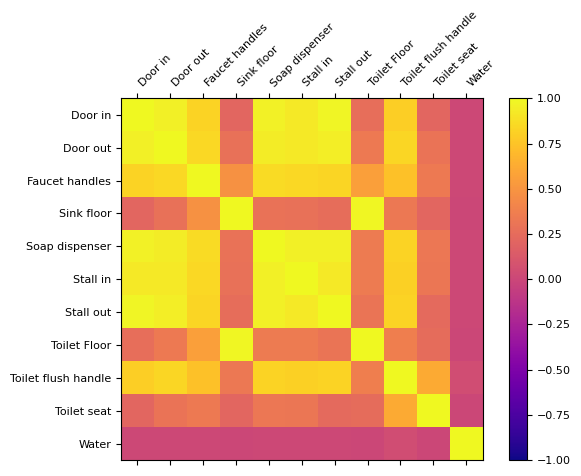

In [37]:
dt_surf_only = dt_surf.drop(['#OTU ID', 'ConsensusLineage'], axis=1)
surf_corr = dt_surf_only.corr()


fig, ax = plt.subplots()
ms = ax.matshow(surf_corr,cmap='plasma', vmin=-1, vmax=1)

ax.set_xticklabels(dt_surf_only.columns)
ax.set_yticklabels(dt_surf_only.columns)

ticks = np.arange(0,len(dt_surf_only.columns),1)
ax.set_xticks(ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='left')
ax.set_yticks(ticks)

cb = fig.colorbar(ms)

fig.tight_layout()

#Changement du layout pour le poster
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# cb.outline.set_color("white")
# cb.ax.yaxis.set_tick_params(color="white")
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color="white")

# plt.savefig('./plot/corr.png', transparent=True)

### Chez les hommes

C:\Users\home\AppData\Local\Temp\ipykernel_18708\76402135.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\home\AppData\Local\Temp\ipykernel_18708\76402135.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



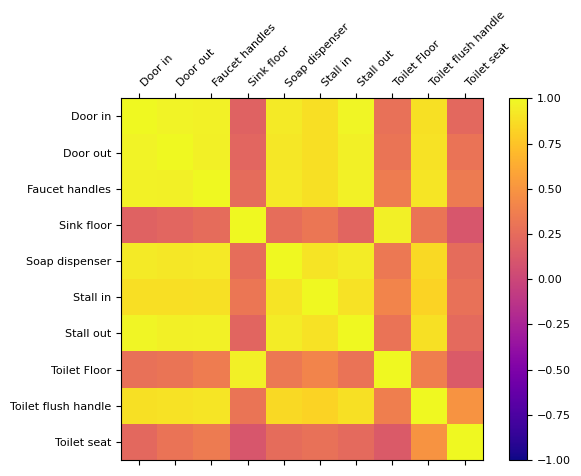

In [38]:
dt_surf_male_only = dt_surf_male.drop(['#OTU ID', 'ConsensusLineage'], axis=1)
surf_corr = dt_surf_male_only.corr()


fig, ax = plt.subplots()
ms = ax.matshow(surf_corr,cmap='plasma', vmin=-1, vmax=1)

ax.set_xticklabels(dt_surf_male_only.columns)
ax.set_yticklabels(dt_surf_male_only.columns)

ticks = np.arange(0,len(dt_surf_male_only.columns),1)
ax.set_xticks(ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='left')
ax.set_yticks(ticks)

cb = fig.colorbar(ms)

fig.tight_layout()

# Changement du layout pour le poster
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# cb.outline.set_color("white")
# cb.ax.yaxis.set_tick_params(color="white")
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color="white")

# plt.savefig('./plot/corrmale.png', transparent=True)

### Chez les femmes

C:\Users\home\AppData\Local\Temp\ipykernel_18708\384094548.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\home\AppData\Local\Temp\ipykernel_18708\384094548.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



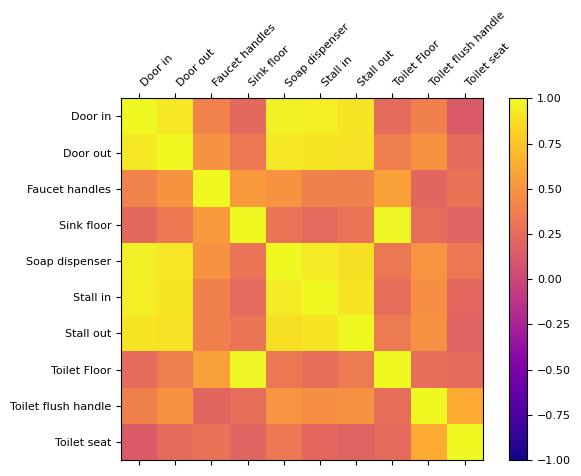

In [39]:
dt_surf_female_only = dt_surf_female.drop(['#OTU ID', 'ConsensusLineage'], axis=1)
surf_corr = dt_surf_female_only.corr()


fig, ax = plt.subplots()
ms = ax.matshow(surf_corr,cmap='plasma', vmin=-1, vmax=1)

ax.set_xticklabels(dt_surf_female_only.columns)
ax.set_yticklabels(dt_surf_female_only.columns)

ticks = np.arange(0,len(dt_surf_female_only.columns),1)
ax.set_xticks(ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='left')
ax.set_yticks(ticks)

cb = fig.colorbar(ms)

fig.tight_layout()

#Changement du layout pour le poster
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# cb.outline.set_color("white")
# cb.ax.yaxis.set_tick_params(color="white")
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color="white")

# plt.savefig('./plot/corrfemale.png', transparent=True)